In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from TF_data_prepro import*

In [2]:
## load data ##
path=r'df_clean.pkl'
df= pd.read_pickle(path)
df.to_csv('df_clean.csv')

In [3]:
## set target ##
pd.set_option('display.max_columns', None)
df['target']=df['price per unit']
df.reset_index(inplace=True,drop=True)
df

,order quantity,price per unit,Customer,By_way,Types,SPEC_1st_L1,SPEC_1st_L2,SPEC_1st_L3,SPEC_1st_N,Ap_outer_r,Ap_L,AP_w,cen_outter_r,cen_L,cen_material,Shell_outer_r,shell_L,shell_material,SPEC_2nd_L1,SPEC_2nd_L2,SPEC_2nd_L3,target
0,1,53000.000,新唐,SEMI,國內終端,X,X,S,20.0,105.000000,136.0,2.85,29.000000,136.0,SUS420,105.000000,87.85,SUS304,W,M,R,53000.000
1,1,49500.000,UMC 8C,SEMI,國內終端,X,X,S,625.0,76.199997,204.0,1.02,44.000000,204.0,SUS420,76.199997,87.50,AL6061,A,M,N,49500.000
2,1,49500.000,UMC 8C,SEMI,國內終端,X,X,S,625.0,76.199997,204.0,1.02,44.000000,204.0,SUS420,76.199997,87.50,AL6061,A,M,N,49500.000
3,1,59015.000,AMAT,DISPLAY,國內設備商,X,X,S,30.0,128.000000,180.5,6.48,54.900002,180.5,SUS420,128.000000,121.00,SUS304,W,M,R,59015.000
4,1,49500.000,UMC 8C,SEMI,國內終端,X,X,S,625.0,76.199997,204.0,1.02,44.000000,204.0,SUS420,76.199997,87.50,AL6061,A,M,N,49500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,2,80870.200,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.000000,241.0,14.33,70.000000,241.0,SUS420,170.000000,127.00,SUS304,C,N,R,80870.200
779,1,80870.200,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.000000,241.0,14.33,70.000000,241.0,SUS420,170.000000,127.00,SUS304,C,N,R,80870.200
780,1,81705.615,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.000000,241.0,14.33,70.000000,241.0,SUS420,170.000000,127.00,SUS304,C,N,R,81705.615
781,1,80754.150,AMAT,DISPLAY,國內設備商,A,X,S,40.0,170.000000,241.0,14.33,70.000000,241.0,SUS420,170.000000,127.00,SUS304,C,N,R,80754.150


In [4]:
all_features,num,cat=feature_col_clean_split(df)
X=num.drop(columns=['price per unit','target']).values
y=num['target'].values

/Users/linli-shang/opt/anaconda3/envs/data/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [5]:
num

,order quantity,price per unit,SPEC_1st_N,Ap_outer_r,Ap_L,AP_w,cen_outter_r,cen_L,Shell_outer_r,shell_L,target
0,1,53000.000,20.0,105.000000,136.0,2.85,29.000000,136.0,105.000000,87.85,53000.000
1,1,49500.000,625.0,76.199997,204.0,1.02,44.000000,204.0,76.199997,87.50,49500.000
2,1,49500.000,625.0,76.199997,204.0,1.02,44.000000,204.0,76.199997,87.50,49500.000
3,1,59015.000,30.0,128.000000,180.5,6.48,54.900002,180.5,128.000000,121.00,59015.000
4,1,49500.000,625.0,76.199997,204.0,1.02,44.000000,204.0,76.199997,87.50,49500.000
...,...,...,...,...,...,...,...,...,...,...,...
778,2,80870.200,40.0,170.000000,241.0,14.33,70.000000,241.0,170.000000,127.00,80870.200
779,1,80870.200,40.0,170.000000,241.0,14.33,70.000000,241.0,170.000000,127.00,80870.200
780,1,81705.615,40.0,170.000000,241.0,14.33,70.000000,241.0,170.000000,127.00,81705.615
781,1,80754.150,40.0,170.000000,241.0,14.33,70.000000,241.0,170.000000,127.00,80754.150


In [6]:
cat

,Customer,By_way,Types,SPEC_1st_L1,SPEC_1st_L2,SPEC_1st_L3,cen_material,shell_material,SPEC_2nd_L1,SPEC_2nd_L2,SPEC_2nd_L3
0,新唐,SEMI,國內終端,X,X,S,SUS420,SUS304,W,M,R
1,UMC 8C,SEMI,國內終端,X,X,S,SUS420,AL6061,A,M,N
2,UMC 8C,SEMI,國內終端,X,X,S,SUS420,AL6061,A,M,N
3,AMAT,DISPLAY,國內設備商,X,X,S,SUS420,SUS304,W,M,R
4,UMC 8C,SEMI,國內終端,X,X,S,SUS420,AL6061,A,M,N
...,...,...,...,...,...,...,...,...,...,...,...
778,AMAT,DISPLAY,國內設備商,A,X,S,SUS420,SUS304,C,N,R
779,AMAT,DISPLAY,國內設備商,A,X,S,SUS420,SUS304,C,N,R
780,AMAT,DISPLAY,國內設備商,A,X,S,SUS420,SUS304,C,N,R
781,AMAT,DISPLAY,國內設備商,A,X,S,SUS420,SUS304,C,N,R


In [7]:
from sklearn.model_selection import train_test_split
x0_train, X_test, y0_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=101)
X_train, X_val, y_train, y_val= train_test_split(x0_train, y0_train, test_size=0.2,
                                                 random_state=101)
print(len(X_train), 'train dataset')
print(len(X_val), 'validation dataset')
print(len(X_test), 'test dataset')

500 train dataset
126 validation dataset
157 test dataset


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
X_train.shape

(500, 9)

In [11]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))


model.add((Dense(1)))
model.compile(optimizer='adam',loss='mse')

In [12]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=512,epochs=6000)


Epoch 1/6000
1/1 [==============================] - 1s 1s/step - loss: 41234337792.0000 - val_loss: 6315542016.0000
Epoch 2/6000
1/1 [==============================] - 0s 30ms/step - loss: 41234337792.0000 - val_loss: 6315500032.0000
Epoch 3/6000
1/1 [==============================] - 0s 34ms/step - loss: 41234337792.0000 - val_loss: 6315453440.0000
Epoch 4/6000
1/1 [==============================] - 0s 37ms/step - loss: 41234341888.0000 - val_loss: 6315404288.0000
Epoch 5/6000
1/1 [==============================] - 0s 35ms/step - loss: 41234354176.0000 - val_loss: 6315351552.0000
Epoch 6/6000
1/1 [==============================] - 0s 38ms/step - loss: 41234337792.0000 - val_loss: 6315293184.0000
Epoch 7/6000
1/1 [==============================] - 0s 36ms/step - loss: 41234333696.0000 - val_loss: 6315231744.0000
Epoch 8/6000
1/1 [==============================] - 0s 36ms/step - loss: 41234333696.0000 - val_loss: 6315153920.0000
Epoch 9/6000
1/1 [==============================] - 0s 53m

In [13]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 1440x2160 with 0 Axes>

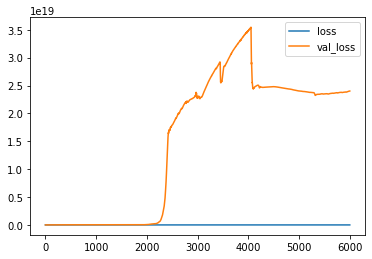

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30))
losses.plot()

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [16]:
predictions=model.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test,predictions))

340901.6904705174

In [18]:
mean_absolute_error(y_test,predictions)

42059.70825415007

In [19]:
df['price per unit'].describe()

count    7.830000e+02
mean     4.810872e+04
std      1.614491e+05
min      6.809600e+02
25%      1.060307e+04
50%      2.992500e+04
75%      4.950000e+04
max      3.980000e+06
Name: price per unit, dtype: float64

In [20]:
explained_variance_score(y_test,predictions)

-33.03152690394318

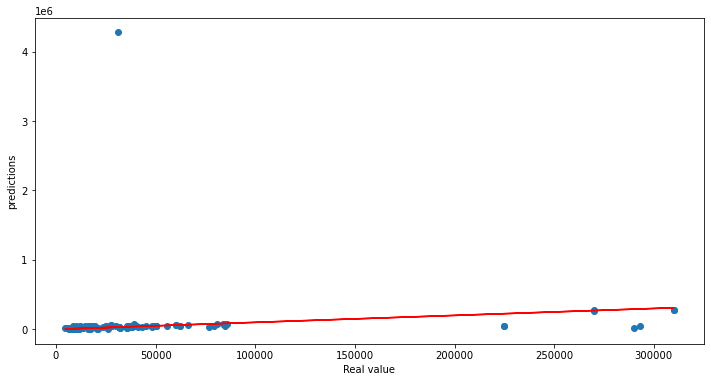

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.xlabel('Real value')
plt.ylabel('predictions')
plt.show()

In [22]:
single_feedthrough=num.drop('price per unit',axis=1).iloc[10]

In [23]:
single_feedthrough=scaler.transform(single_feedthrough.values.reshape(-1,10))

ValueError: X has 10 features, but MinMaxScaler is expecting 9 features as input.

In [ ]:
model.predict(single_feedthrough)

In [ ]:
df['price per unit'].iloc[10]

In [ ]:
y_test.shape

In [ ]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

In [ ]:
import seaborn as sns
sns.distplot(errors)
plt.xlabel('Errors')
plt.show()

In [ ]:
##model.save('model_0998_val.h5')